___

 # <center>**STOCK PRICE PREDICTION ( NMB )**</center>

___

## **Importing Libraries**

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import timedelta

## **Preprocessing**

### Loading Stock Data from CSV File

In [156]:
file_path = r"Data.csv"
data = pd.read_csv(file_path)

### Making sure 'Date' column is in datetime format

In [159]:
 data['Date'] = pd.to_datetime(data['Date'])

### Converting numeric columns to float, and removing unnecessary commas

In [164]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    data[col] = data[col].astype(str).str.replace(',', '').astype(float)

### Deleting rows with empty value

In [167]:
data.dropna(inplace=True)

___

## **Descriptive statistics**

___

In [172]:
data.describe(include='all')

,Date,Open,High,Low,Close,Volume
count,99,99.000000,99.000000,99.000000,99.000000,99.00000
mean,2024-10-11 13:49:05.454545408,257.982727,262.141414,251.968687,256.709091,138776.79798
min,2024-07-23 00:00:00,233.300000,240.000000,225.000000,236.900000,22273.00000
25%,2024-09-01 12:00:00,248.000000,251.750000,241.750000,247.400000,60160.50000
50%,2024-10-09 00:00:00,258.200000,260.900000,251.000000,257.000000,96873.00000
75%,2024-11-24 12:00:00,266.500000,270.000000,259.000000,262.650000,168232.50000
max,2025-01-01 00:00:00,286.000000,300.000000,279.600000,284.300000,712865.00000
std,NaN,12.539271,12.954087,11.688042,12.198846,126577.24411


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    99 non-null     datetime64[ns]
 1   Open    99 non-null     float64       
 2   High    99 non-null     float64       
 3   Low     99 non-null     float64       
 4   Close   99 non-null     float64       
 5   Volume  99 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.8 KB


In [176]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Defining Features as Independent Variables and Target as Dependent Variable

In [179]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
X = data[features]
y = data[target]

___

# **Exploratory Data Analysis (EDA)**

___

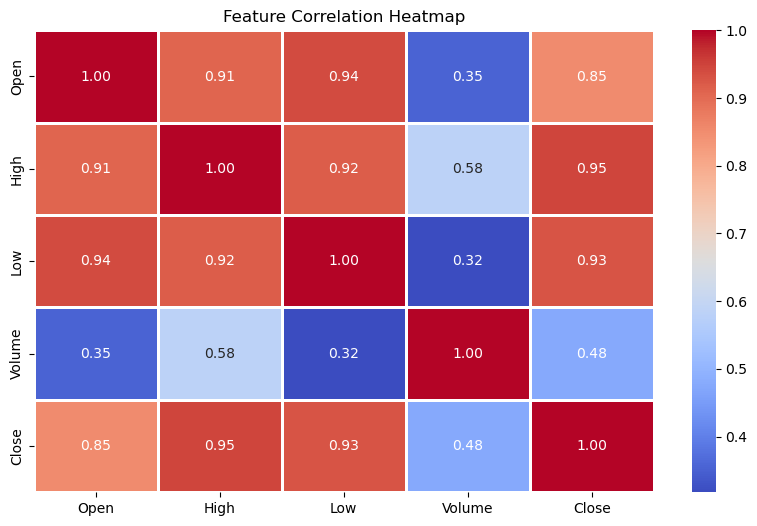

In [184]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()

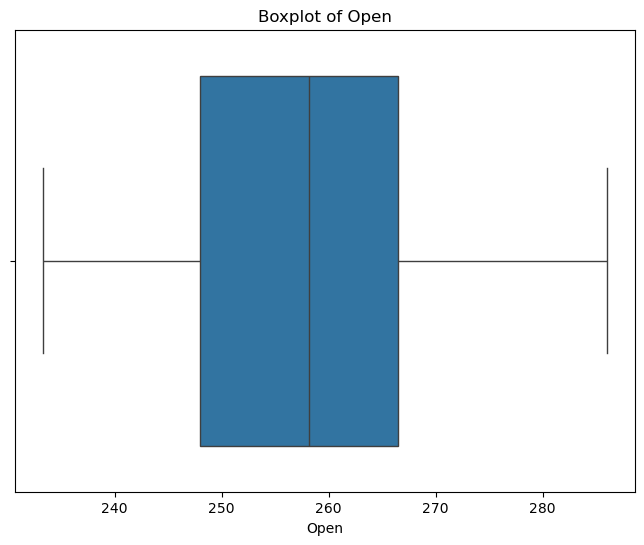

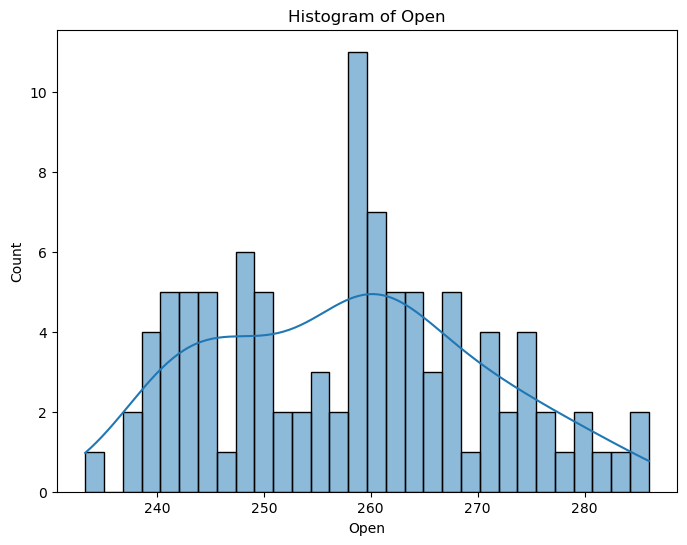

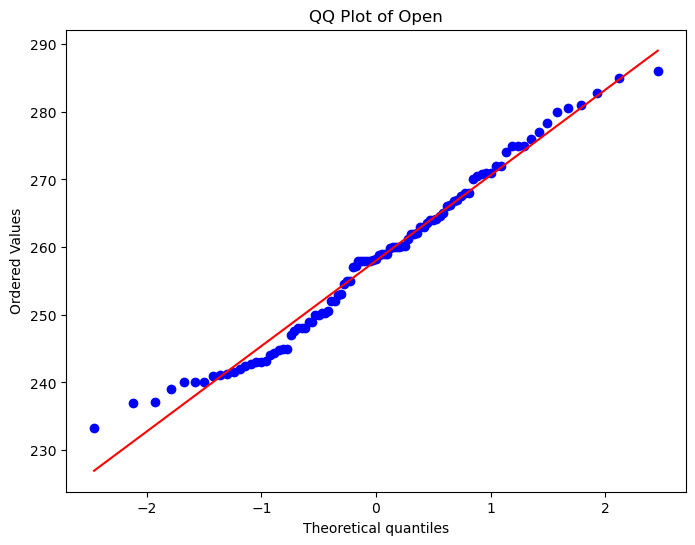

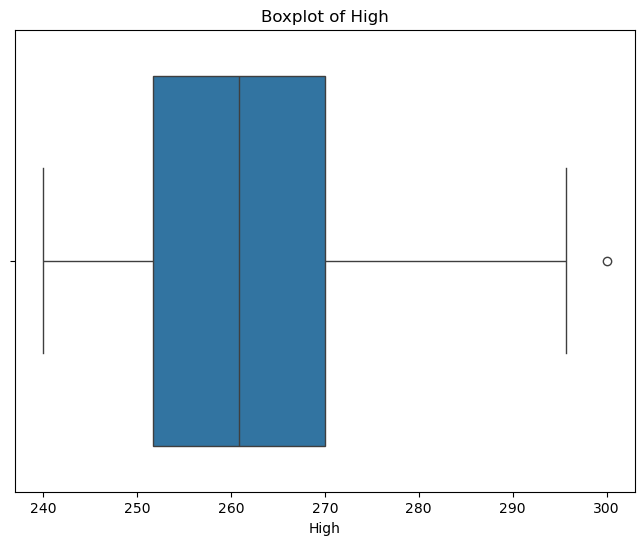

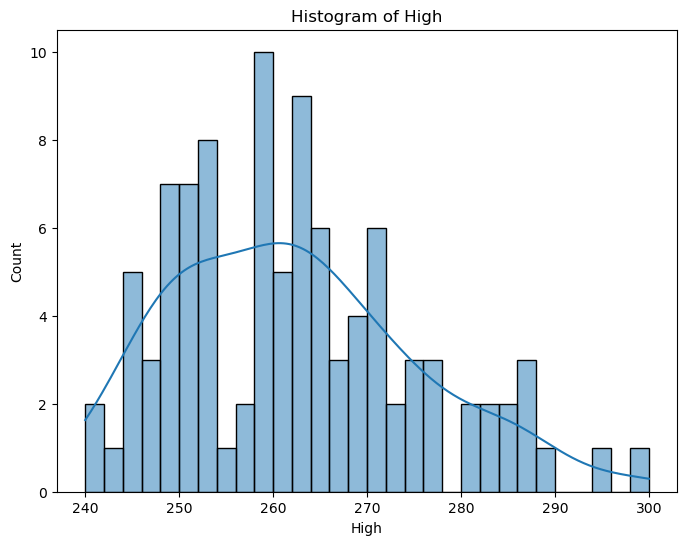

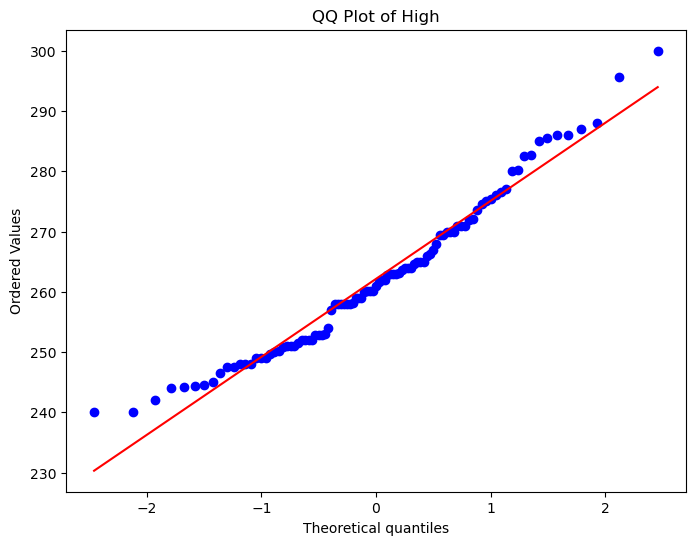

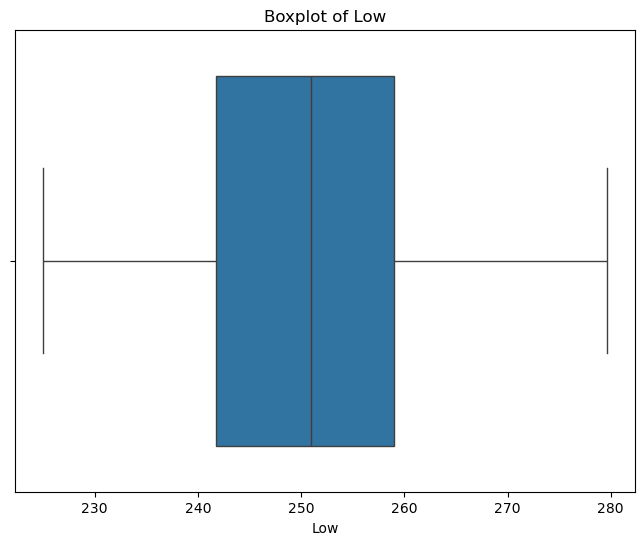

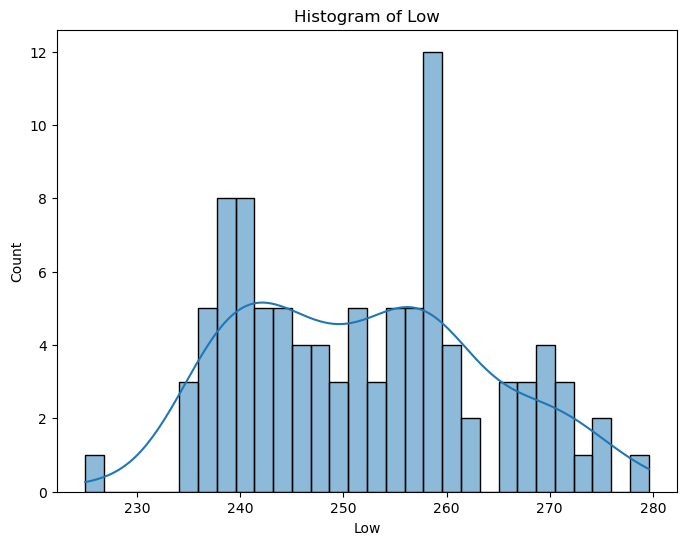

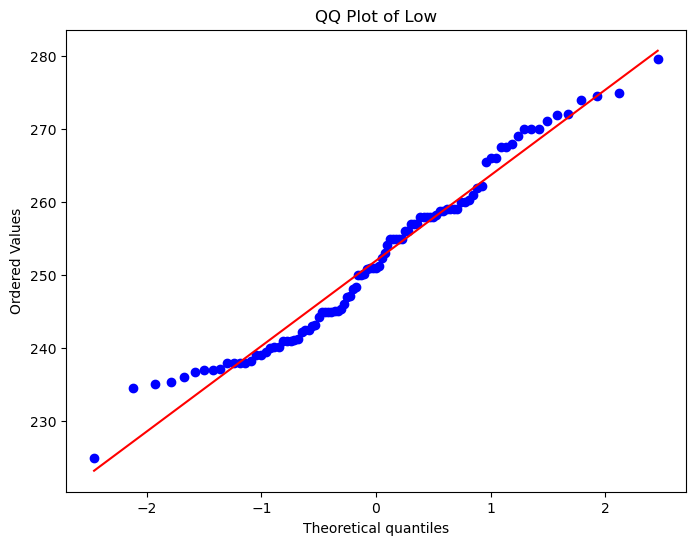

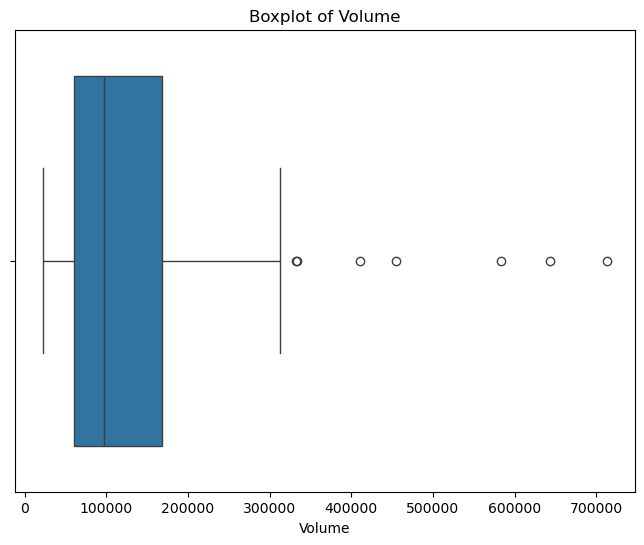

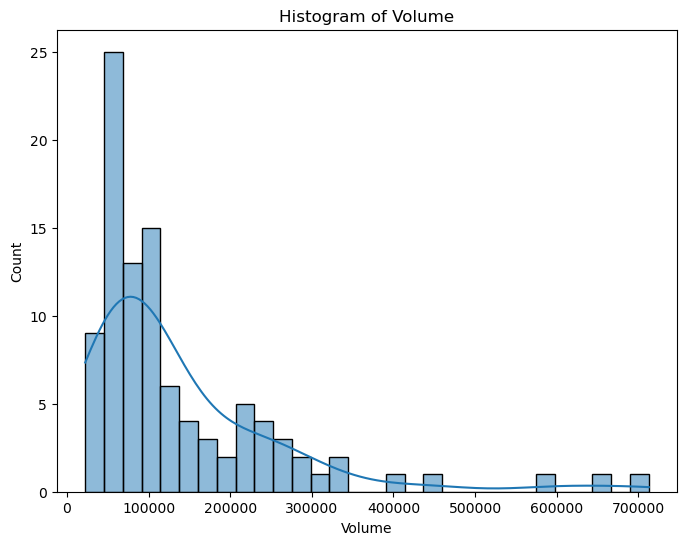

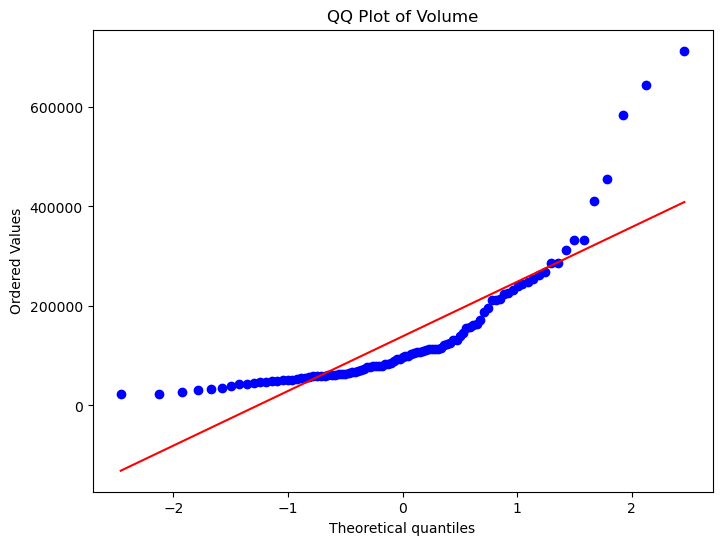

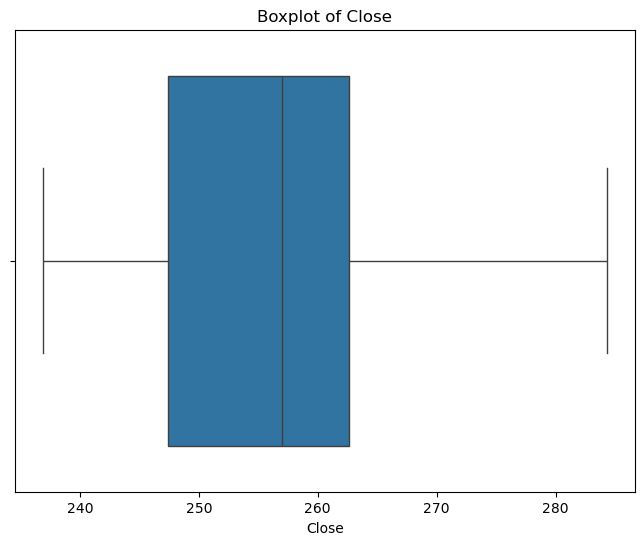

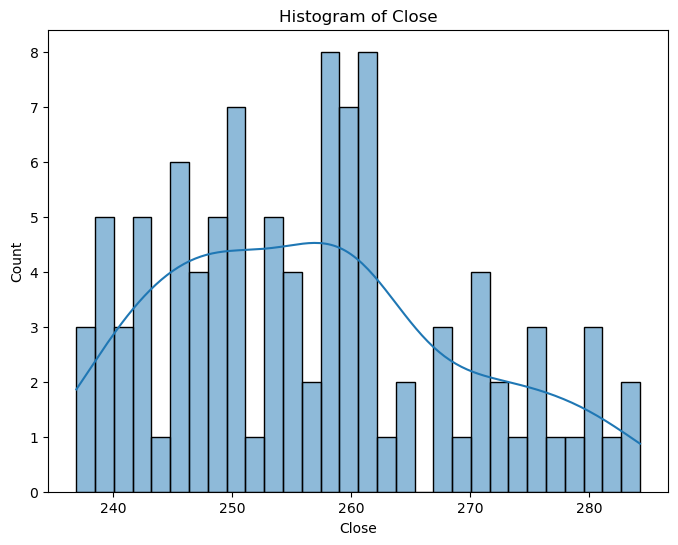

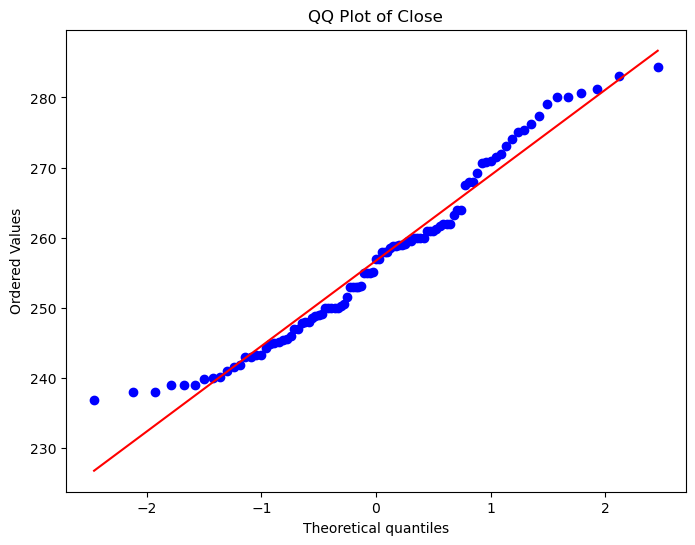

In [185]:
for column in features + [target]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.show()

### Train-Test Split (using 80% Train, 20% Test)

In [188]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

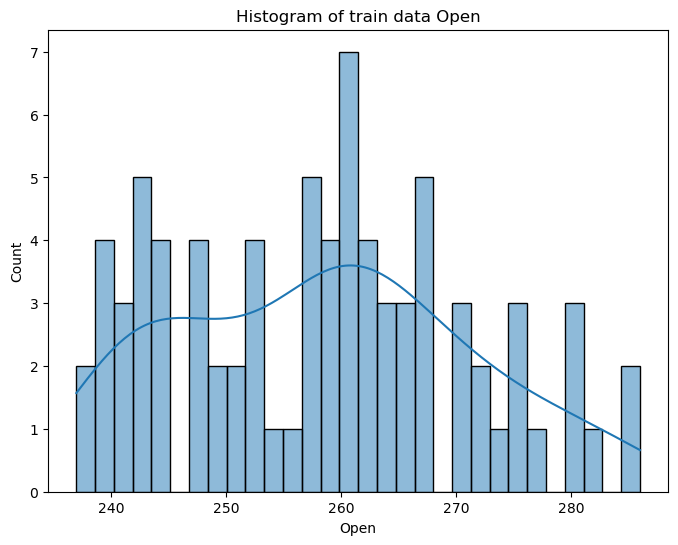

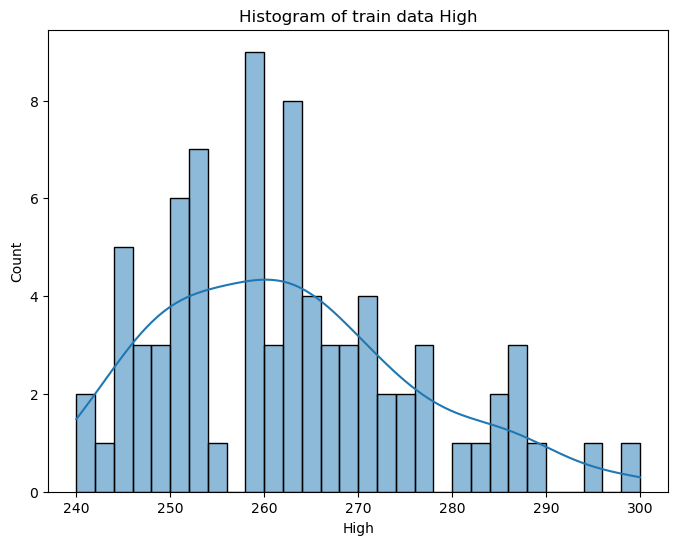

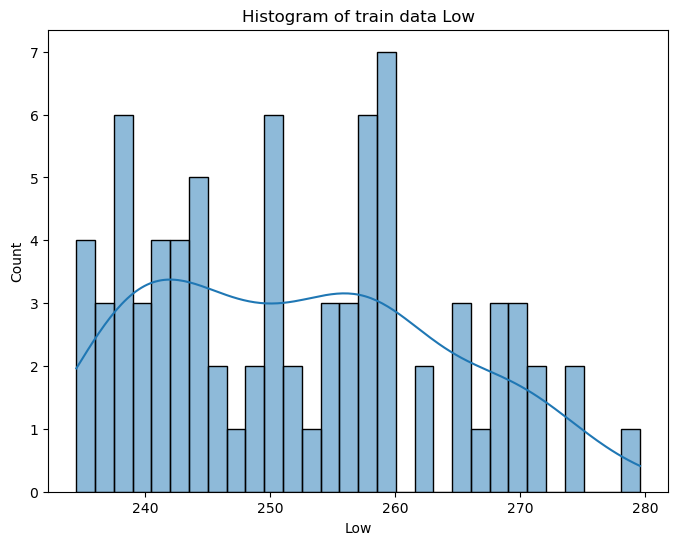

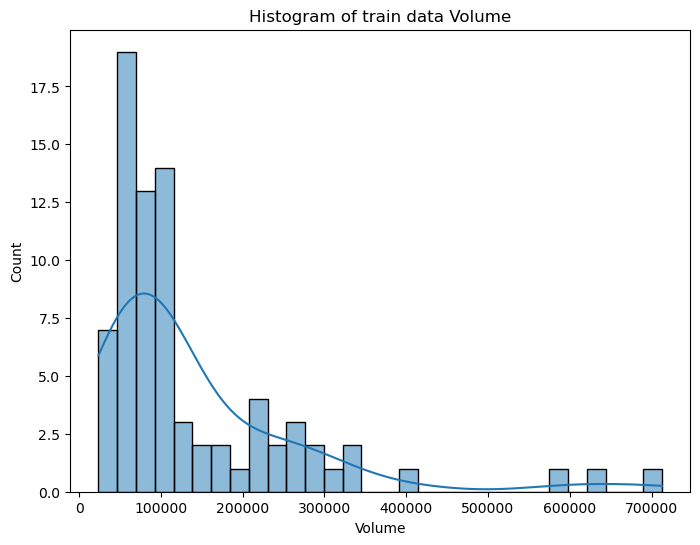

In [189]:
for column in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[column], kde=True, bins=30)
    plt.title(f'Histogram of train data {column}')
    plt.show()

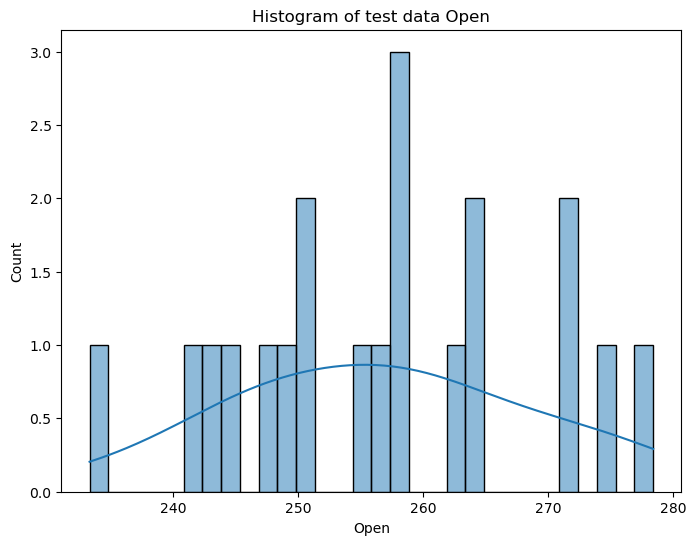

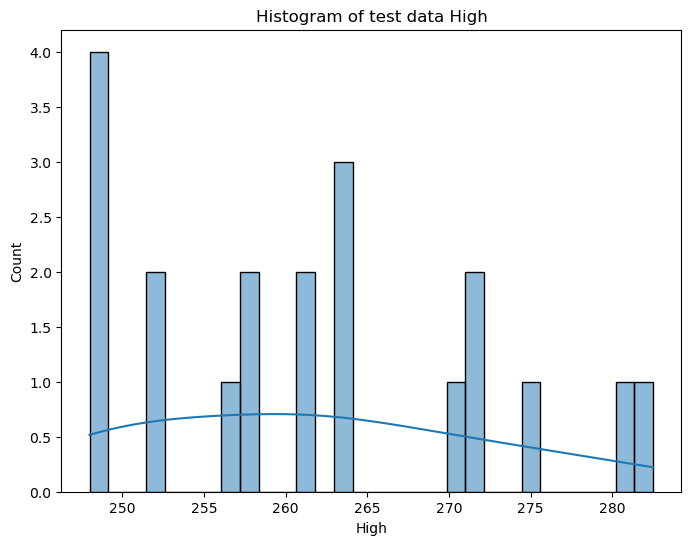

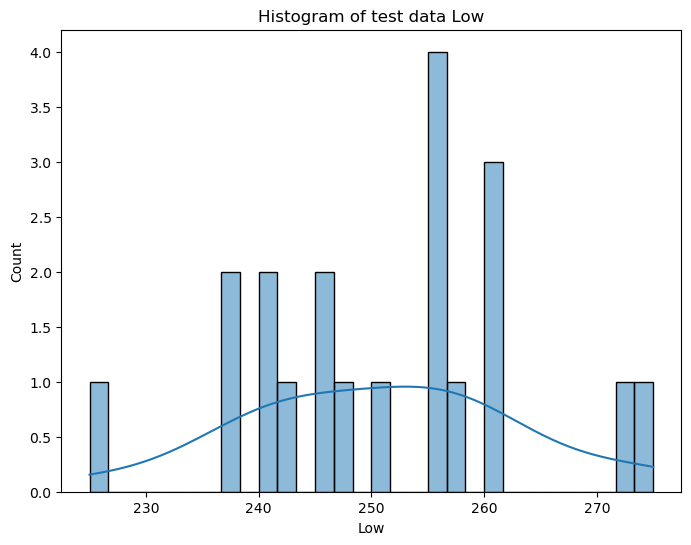

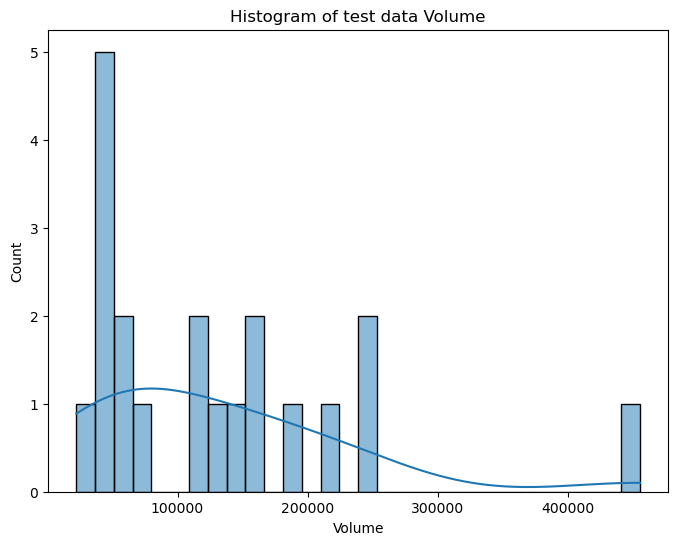

In [190]:
for column in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_test[column], kde=True, bins=30)
    plt.title(f'Histogram of test data {column}')
    plt.show()  

### Training the Linear Regression Model from Scikit-learn

In [192]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [193]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2,mse,mae

(0.9045361701920204, 11.239099879038154, 2.6512067060395665)

## **Plot Actual vs. Predicted Prices**

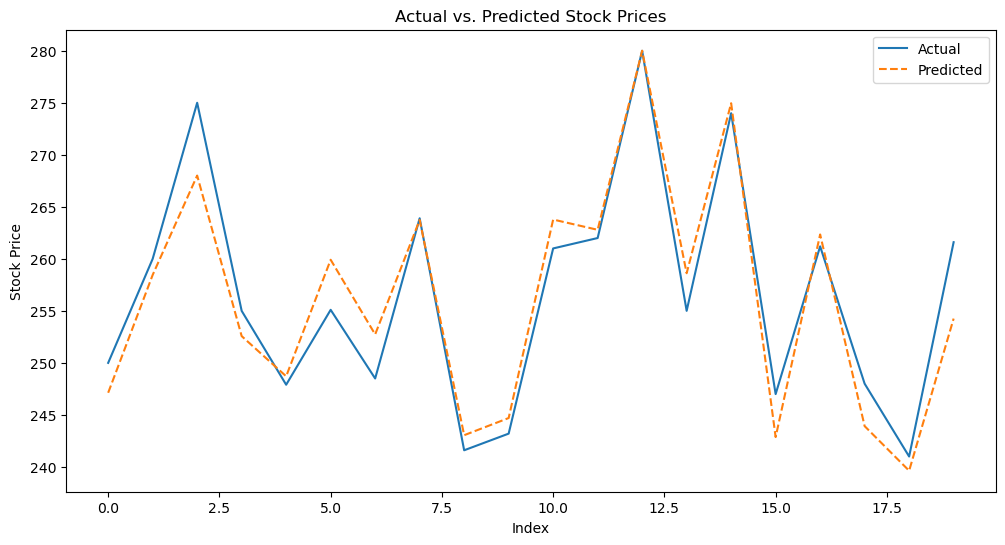

In [197]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", linestyle="-")
plt.plot(y_pred, label="Predicted", linestyle="--")
plt.xlabel("Index")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()


In [198]:
df_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
df_results.to_csv('actual_vs_predicted.csv', index=False)

In [199]:
data['Volume']

0      22273.0
1      73136.0
2      53794.0
3      77229.0
4      66351.0
        ...   
94    583851.0
95    455185.0
96    231456.0
97    240234.0
98    253696.0
Name: Volume, Length: 99, dtype: float64

In [224]:
mean_open = data["Open"].mean() + 10
median_high = data["High"].median() - 2
median_low = data["Low"].median()
median_volume = data["Volume"].median()

# Input for number of days into the future to predict
future_days = int(input("Enter the number of days into the future to predict: "))
last_date = data["Date"].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]

# Generate random data with some variations
open_values = [mean_open + np.random.normal(0, 5) for i in range(future_days)]  # Random fluctuation around mean_open
high_values = [median_high + np.random.normal(0, 3) for i in range(future_days)]  # Random fluctuation around median_high
low_values = [median_low + np.random.normal(0, 2) for i in range(future_days)]  # Random fluctuation around median_low
volume_values = [median_volume + np.random.normal(0, 500) for i in range(future_days)]  # Random fluctuation around median_volume

# Create the future DataFrame
future_data = pd.DataFrame({
    "Date": future_dates,
    "Open": open_values,
    "High": high_values,
    "Low": low_values,
    "Volume": volume_values  
})

Enter the number of days into the future to predict:  60


In [226]:
future_data

,Date,Open,High,Low,Volume
0,2025-01-02,277.050573,261.090053,250.782599,96734.587166
1,2025-01-03,266.347678,259.989274,250.236617,95859.736437
2,2025-01-04,269.293459,263.812157,252.339388,96760.848742
3,2025-01-05,270.511374,264.711300,249.756769,96947.588567
4,2025-01-06,263.832781,266.789492,252.834304,97441.499741
5,2025-01-07,273.423101,259.859959,253.397241,97067.578719
6,2025-01-08,271.748484,260.599982,249.261521,96799.390109
7,2025-01-09,271.996443,258.573718,248.906084,97100.680957
8,2025-01-10,270.416194,259.345732,248.063947,97253.107507
9,2025-01-11,266.537982,254.895797,251.021222,97506.257618


In [228]:
future_predictions = model.predict(future_data.drop('Date',axis=1))

In [230]:
df_future = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})

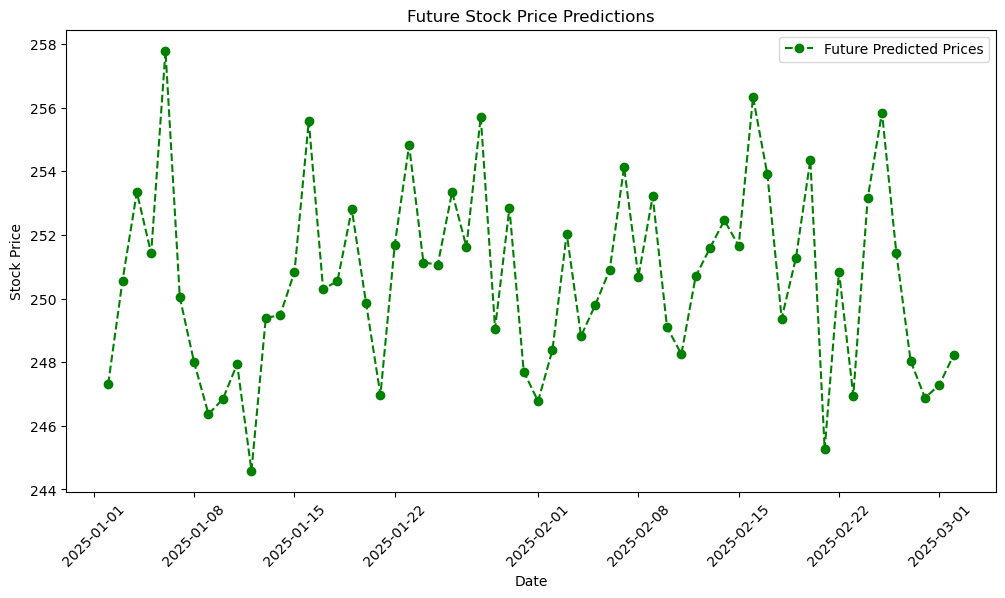

In [232]:
plt.figure(figsize=(12, 6))
plt.plot(df_future['Date'], df_future['Predicted Price'], marker='o', linestyle='--', color='green', label='Future Predicted Prices')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Future Stock Price Predictions")
plt.legend()
plt.xticks(rotation=45)
plt.show()


***

# ***<center>THE END</center>***